# Intro
This notebook contains code for exploration analysis.

In [1]:
%matplotlib inline
import gym
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

## Create agent that performs randomly and let it act for a while in order to acquire data about state distribution.

In [16]:
observations = []

env = gym.make('LunarLander-v2')

for episode in tqdm_notebook(range(1000)):
    state = env.reset()
    
    for i in range(1000):
        observations.append(state)
        action = np.random.randint(4)
        state, reward, done, _ = env.step(action)
        # uncomment for rendering
#         env.render()
        
        if done:
            break

## Function for drawing histograms of states

In [19]:
def plot_dist(data, fname):
    fig = plt.figure(figsize=(10,20))
    axes = []
    axes.append(fig.add_subplot(421))
    axes.append(fig.add_subplot(422))
    axes.append(fig.add_subplot(423))
    axes.append(fig.add_subplot(424))
    axes.append(fig.add_subplot(425))
    axes.append(fig.add_subplot(426))
    axes.append(fig.add_subplot(427))
    axes.append(fig.add_subplot(428))

    for i in range(8):
        sns.distplot(data[:, i], kde=False, ax=axes[i])
        axes[i].set_xlabel('$s_{}$'.format(i))
    sns.plt.savefig(fname)

## Histogram for random agent

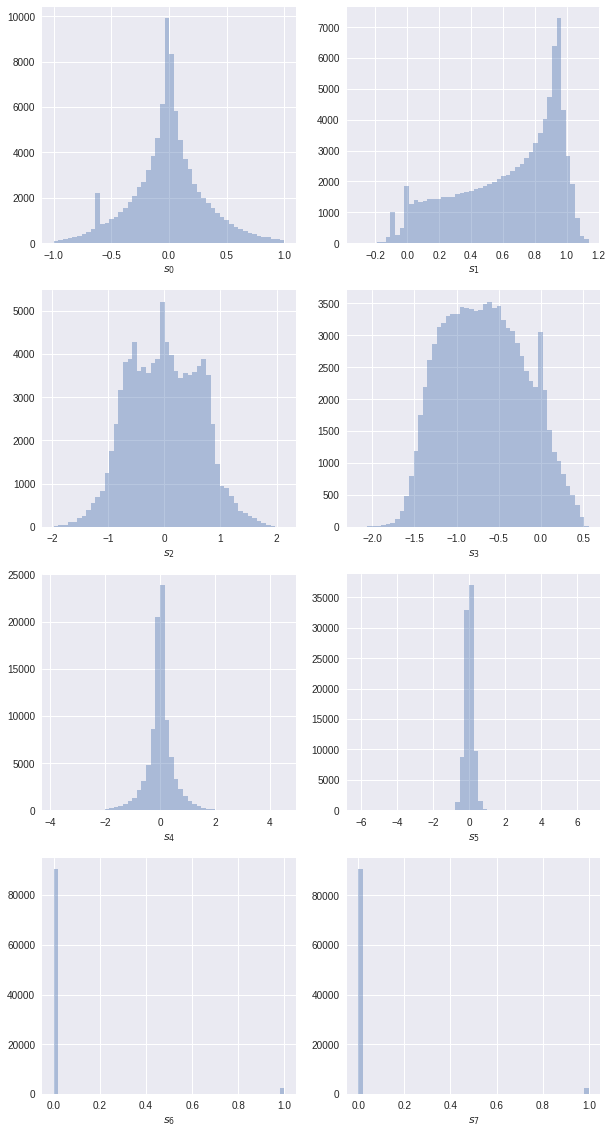

In [22]:
data = np.array(observations)
plot_dist(data, 'random.png')

## Load previously saved policy (trained one)

In [23]:
trained_policy_fname = 'policy13'
from pepg import NeuralNetPolicy
policy = NeuralNetPolicy(8,4,32)

## Do the same but with trained policy

In [24]:
env = gym.make('LunarLander-v2')

theta = np.load(trained_policy_fname)

observations = []

for episode in tqdm_notebook(range(1000)):
    state = env.reset()
    
    for i in range(1000):
        observations.append(state)
        action = policy.forward_pass(theta, state)
        state, reward, done, _ = env.step(action)
#         env.render()
        
        if done:
            break

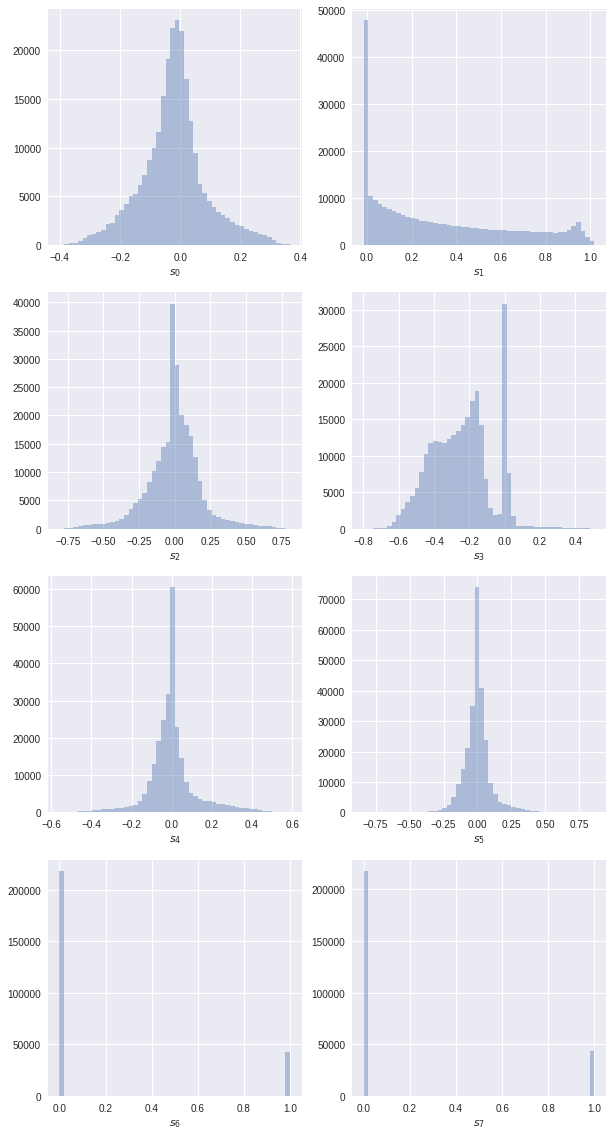

In [25]:
data = np.array(observations)
plot_dist(data, 'trained.png')